# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Jakob Maurer

Datum: 22.11.2023 

Gruppe: 87

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Folgt die warme Flüssigkeit dem Abkühlungsverlauf den man durch das newtonsche Abkühlungsgesetz erwartet ?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


<img src="figures/newton.JPEG" width="800">

## Versuchsauswertung

In [8]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
import json
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [9]:
# TODO: 
path_data = "archive/newton/newton.h5"

# DONE #

In [45]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
f = h5py.File(path_data,'r+')
md = m_json.get_metadata_from_setup("archive/newton/setup_newton.json")
#md = metadaten aus dem setup _newton
uuid_umgebung = "1ee849e6-7bb0-6c74-8a4f-5bf9aab74b8b"
uuid_warm = "1ee849fd-4b0b-6f67-9732-5a65450e06b2"
#es wird vorher festgelegt welcher sensor welche Temperatur misst
temp_warm = list(f["RawData"][uuid_warm]["temperature"])
temp_umgebung = list(f["RawData"][uuid_umgebung]["temperature"])

temp_warm.pop()

temp_diff = []
for i, tw in enumerate(temp_warm):
    temp_diff.append(tw-temp_umgebung[i])


time_warm = list(f["RawData"][uuid_warm]["timestamp"])
time_warm.pop()
print(time_warm)
# DONE #

[45.382258892059326, 46.982259035110474, 48.58224081993103, 50.18214774131775, 51.78215837478638, 53.38214874267578, 54.98223614692688, 56.58246660232544, 58.214176416397095, 59.81361770629883, 61.413657665252686, 63.01361584663391, 64.61427474021912, 66.21427750587463, 67.81427764892578, 69.41417074203491, 71.01416087150574, 72.61431121826172, 74.2143006324768, 75.81426215171814, 77.41412425041199, 79.01432704925537, 80.61595559120178, 82.27827787399292, 83.87815833091736, 85.54165458679199, 87.14166331291199, 88.7416934967041, 90.3423523902893, 91.94225978851318, 93.54226517677307, 95.1736569404602, 96.77366304397583, 98.40560483932495, 100.00626516342163, 101.60605478286743, 103.20634508132935, 104.80618262290955, 106.40626525878906, 108.00566458702087, 109.63775634765625, 111.23766779899597, 112.83817267417908, 114.47026228904724, 116.07017469406128, 117.67074298858643, 119.26971817016602, 120.86966562271118, 122.46965885162354, 124.07042932510376, 125.68613767623901, 127.302270650

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

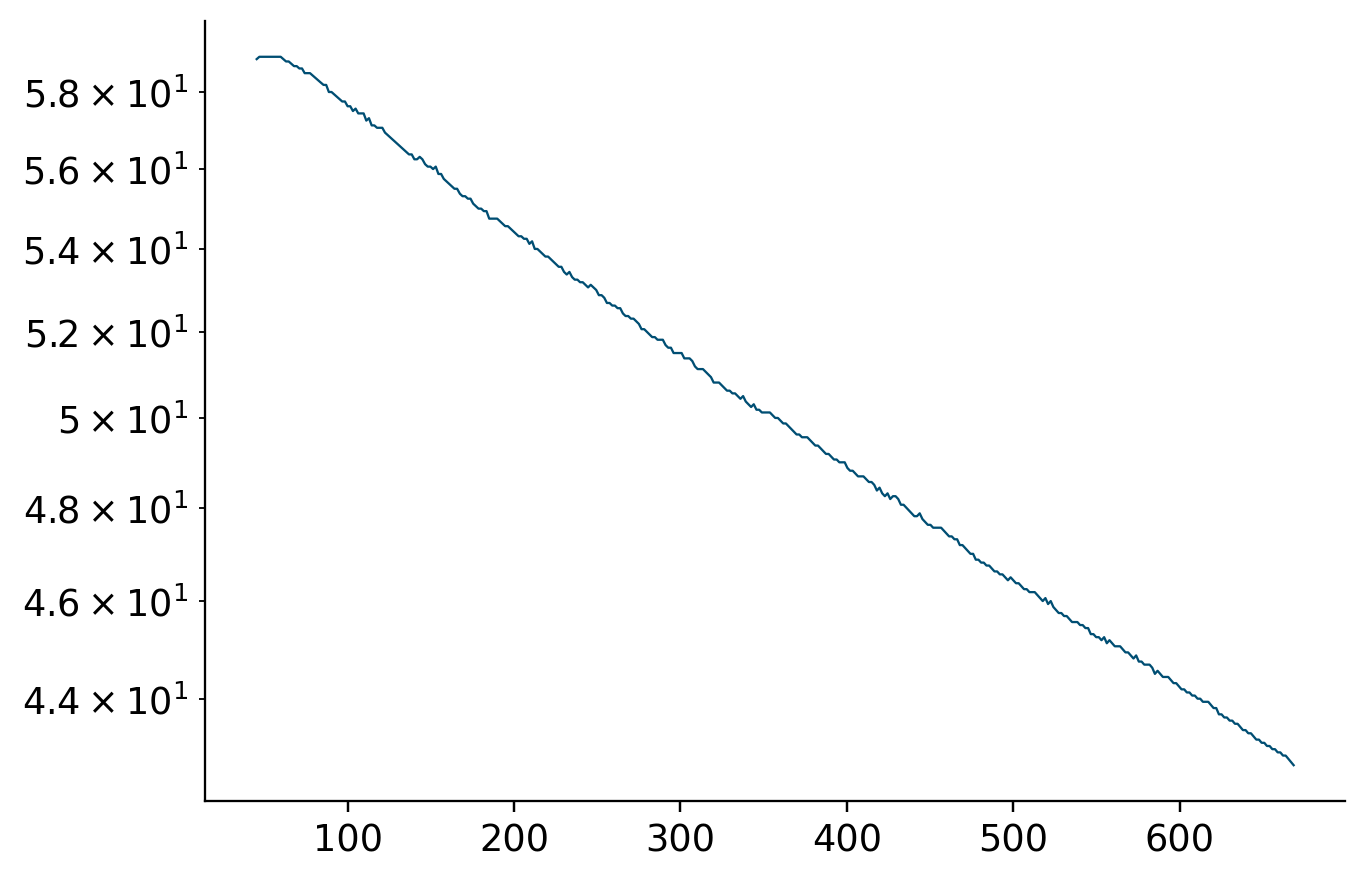

In [40]:
# TODO: Use the temperature and time data for plotting
plt.plot(time_warm,temp_diff)
plt.yscale('log', base=10)
plt.show()
# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [48]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
t_2 = np.average(temp_umgebung)
t_1 = temp_warm[0]
coeff = np.polyfit(time_warm,temp_diff,1) #gibt koeffizienten als Liste an 

K=[]

for t in time_warm:
    K.append((np.log(coeff[0]*t+coeff[1])/(t_1-t_2))/t) #Formel umstellen und K's errechnen
print(coeff)

# DONE #

[-2.65698617e-02  5.98418322e+01]


#### (iV) Ergebnis

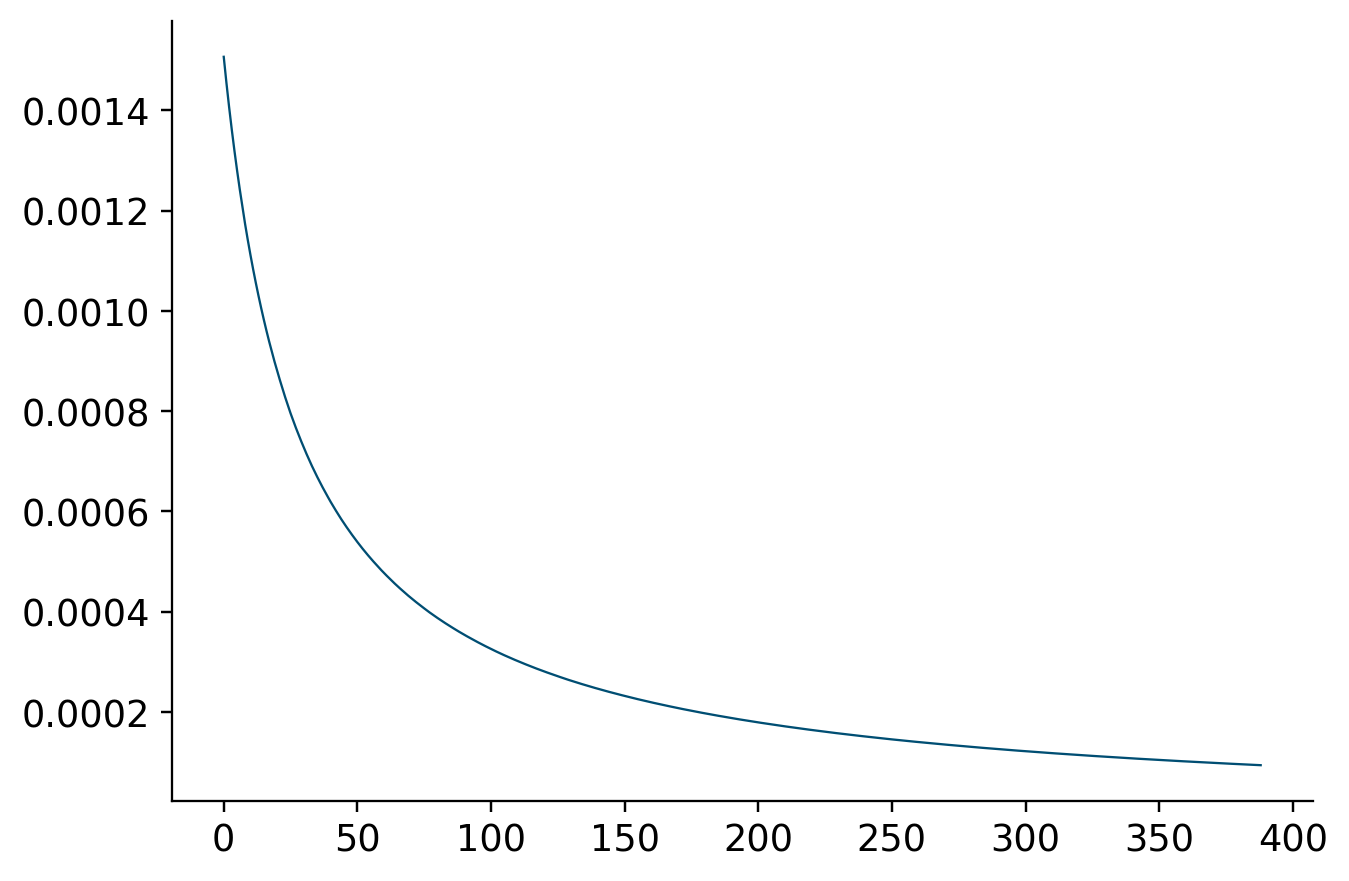

In [50]:
# TODO: Print result
plt.plot(K)

# DONE #

## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Am Graphen lässt sich ablesen dass die K's mit der Zeit immer weiter abnehmen und nicht konstant sind. Gegen ende bei niedrigeren temperaturen nähern sie sich jedoch einer Konstanten an.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Die umgebungsbedingungen und ungenauen sensoren lassen kein eindeutiges Bild zu, jedoch scheint das newtonsche Abkühlungsgesetzt hier nicht zu gelten. Wahrscheinlich sind die Störgrößen zu dominant.